In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', None)
plt.rcParams['font.family'] = 'IPAexGothic'

## BCCWJ

In [8]:
df = pd.read_csv('bccwj_surprisals/aggregated.csv')
arch2shape = {'trans-lg': 'o', 'lstm': 's', 'trans-sm': '^', 'ngram': '+'}
data_size2dot_size = {'lg': 400, 'md': 300, 'sm': 200, '-': 400}
update2color = {'100000': 'maroon' , '10000': 'salmon', '1000': 'limegreen', '100': 'lightblue', '-': 'black'}
arch2edge = {'trans-lg': 'white', 'lstm': 'white', 'trans-sm': 'white', 'ngram': 'black'}

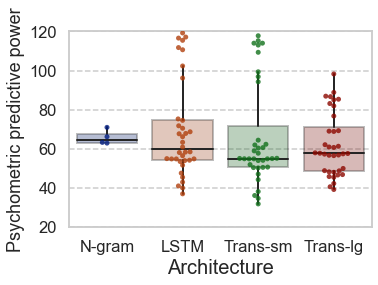

In [141]:
sns.set(font_scale=1.7)
sns.set('talk', 'whitegrid', 'dark',
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

ax = sns.swarmplot(x=df["arch"], y =df["delta_linear_fit_logLik"], order=['ngram', 'lstm', 'trans-sm', 'trans-lg'], alpha=0.8)
ax = sns.boxplot(x=df["arch"], y =df["delta_linear_fit_logLik"], order=['ngram', 'lstm', 'trans-sm', 'trans-lg'], boxprops={'alpha':0.3}, showcaps=False, showfliers=False)
ax.set_xlabel('Architecture',fontsize=20)
ax.set_ylabel('Psychometric predictive power',fontsize=18)
ax.set_xticklabels(['N-gram', 'LSTM', 'Trans-sm', 'Trans-lg'])
ax.set(ylim=(20,120))
fig = ax.get_figure()
fig.subplots_adjust(left=0.2, bottom=0.2)

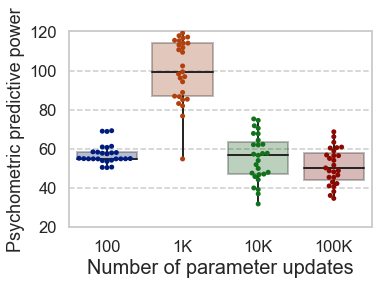

In [142]:
sns.set(font_scale=1.7)
sns.set('talk', 'whitegrid', 'dark',
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
ax = sns.swarmplot(x=df[df['arch']!='ngram']["n_updates"], y=df[df['arch']!='ngram']["delta_linear_fit_logLik"], order=['100', '1000', '10000', '100000'])
ax = sns.boxplot(x=df[df['arch']!='ngram']["n_updates"], y=df[df['arch']!='ngram']["delta_linear_fit_logLik"], order=['100', '1000', '10000', '100000'], boxprops={'alpha':0.3}, showcaps=False, showfliers=False)
ax.set_xlabel('Number of parameter updates',fontsize=20)
ax.set_ylabel('Psychometric predictive power',fontsize=18)
ax.set_xticklabels(['100', '1K', '10K', '100K'])
ax.set(ylim=(20,120))
fig = ax.get_figure()
fig.subplots_adjust(left=0.2, bottom=0.2)

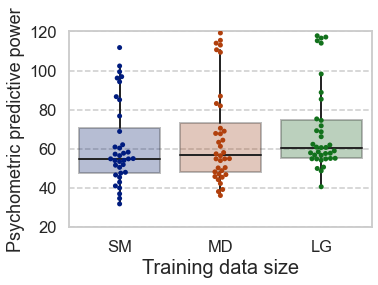

In [143]:
sns.set(font_scale=1.7)
sns.set('talk', 'whitegrid', 'dark',
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
ax = sns.swarmplot(x=df[df['arch']!='ngram']["data_size"], y =df[df['arch']!='ngram']["delta_linear_fit_logLik"], order=['sm', 'md', 'lg'])
ax = sns.boxplot(x=df[df['arch']!='ngram']["data_size"], y =df[df['arch']!='ngram']["delta_linear_fit_logLik"], order=['sm', 'md', 'lg'], boxprops={'alpha':0.3}, showcaps=False, showfliers=False)
ax.set_xlabel('Training data size',fontsize=20)
ax.set_ylabel('Psychometric predictive power',fontsize=18)
ax.set_xticklabels(['SM', 'MD', 'LG'])
ax.set(ylim=(20,120))
fig = ax.get_figure()
fig.subplots_adjust(left=0.2, bottom=0.2)

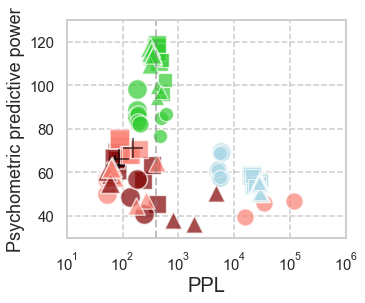

In [144]:
sns.set(font_scale=2)
sns.set('talk', 'whitegrid', 'dark',
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
fig, ax = plt.subplots(figsize=(5, 4))
for k, r in df.iterrows():
    if r['PPL'] < 1000000:
        sns.scatterplot(x=[r['PPL']], y=[r['delta_linear_fit_logLik']], 
                    marker=arch2shape[r['arch']], s=data_size2dot_size[str(r['data_size'])], 
                    color=update2color[str(r['n_updates'])], alpha=0.7, edgecolor=arch2edge[r['arch']])
ax.set(xscale="log", xlim=(10, 1000000), ylim=(30,130))
ax.set_xlabel('PPL',fontsize=20)
ax.set_ylabel('Psychometric predictive power',fontsize=18)
plt.xscale('log')
ax.tick_params(labelsize=15)
plt.axvline(x=400, label='line at PPL = 400', color='gray', linestyle='--', alpha=0.5)

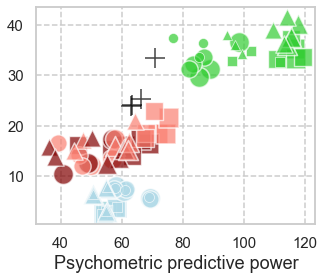

In [145]:
sns.set(font_scale=2)
sns.set('talk', 'whitegrid', 'dark',
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

fig, ax = plt.subplots(figsize=(5, 4))
for k, r in df.iterrows():
    if r['PPL'] < 1000000:
        sns.scatterplot(x=[r['delta_linear_fit_logLik']], y=[r['delta_logLik_WLSPLUWA']], 
                    marker=arch2shape[r['arch']], s=size2size[str(r['data_size'])], 
                    color=update2color[str(r['n_updates'])], alpha=0.7, edgecolor=arch2edge[r['arch']])

ax.set_xlabel('Psychometric predictive power',fontsize=18)
ax.tick_params(labelsize=15)

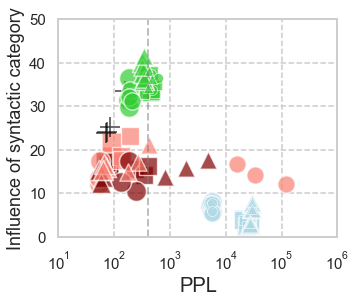

In [146]:
sns.set(font_scale=2)
sns.set('talk', 'whitegrid', 'dark',
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
fig, ax = plt.subplots(figsize=(5, 4))
ax.set(ylim=(0,50))

for k, r in df.iterrows():
    if r['PPL'] < 1000000:
        sns.scatterplot(x=[r['PPL']], y=[r['delta_logLik_WLSPLUWA']], 
                    marker=arch2shape[r['arch']], s=size2size[str(r['data_size'])], 
                    color=update2color[str(r['n_updates'])], alpha=0.7, edgecolor=arch2edge[r['arch']])
ax.set(xscale="log", xlim=(10, 1000000))
ax.set_xlabel('PPL',fontsize=20)
ax.set_ylabel('Influence of syntactic category',fontsize=18)
plt.xscale('log')
ax.tick_params(labelsize=15)
plt.axvline(x=400, label='line at PPL = 400', color='gray', linestyle='--', alpha=0.5)

## Dundee
We found and fixed a minor bug in data preprocessing after camera-ready submission.
The follwinig figures are slighlty differnet with those presented in our paper, but the conclusion is not changed.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('dundee_surprisals/aggregated.csv')
arch2shape = {'trans-lg': 'o', 'lstm': 's', 'trans-sm': '^', 'ngram': '+'}
size2size = {'lg': 400, 'md': 300, 'sm': 100, '-': 400}
update2color = {'100000': 'maroon' , '10000': 'salmon', '1000': 'limegreen', '100': 'lightblue', '-': 'black'}
arch2edge = {'trans-lg': 'white', 'lstm': 'white', 'trans-sm': 'white', 'ngram': 'black'}

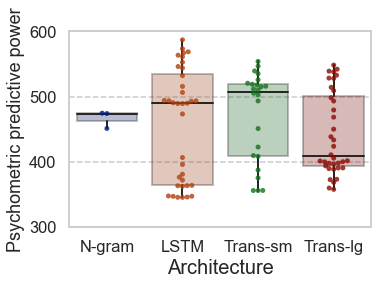

In [154]:
sns.set(font_scale=1.7)
sns.set('talk', 'whitegrid', 'dark',
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
ax = sns.swarmplot(x=df["arch"], y =df["delta_linear_fit_logLik"], order=['ngram', 'lstm', 'trans-sm', 'trans-lg'], alpha=0.8)
ax = sns.boxplot(x=df["arch"], y =df["delta_linear_fit_logLik"], order=['ngram', 'lstm', 'trans-sm', 'trans-lg'], boxprops={'alpha':0.3}, showcaps=False, showfliers=False)
ax.set_xlabel('Architecture',fontsize=20)
ax.set_ylabel('Psychometric predictive power',fontsize=18)
ax.set_xticklabels(['N-gram', 'LSTM', 'Trans-sm', 'Trans-lg'])
ax.set(ylim=(300,600))
fig = ax.get_figure()
fig.subplots_adjust(left=0.2, bottom=0.2)

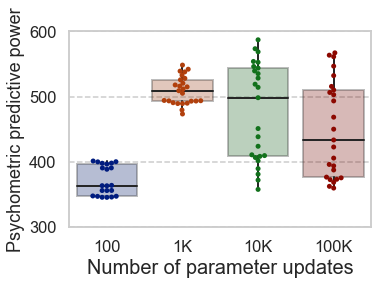

In [155]:
sns.set('talk', 'whitegrid', 'dark',
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
ax = sns.swarmplot(x=df[df['arch']!='ngram']["n_updates"], y =df[df['arch']!='ngram']["delta_linear_fit_logLik"], order=['100', '1000', '10000', '100000'])
ax = sns.boxplot(x=df[df['arch']!='ngram']["n_updates"], y =df[df['arch']!='ngram']["delta_linear_fit_logLik"], order=['100', '1000', '10000', '100000'], boxprops={'alpha':0.3}, showcaps=False, showfliers=False)

ax.set_xlabel('Number of parameter updates',fontsize=20)
ax.set_ylabel('Psychometric predictive power',fontsize=18)
ax.set_xticklabels(['100', '1K', '10K', '100K'])
ax.set(ylim=(300,600))
fig = ax.get_figure()
fig.subplots_adjust(left=0.2, bottom=0.2)

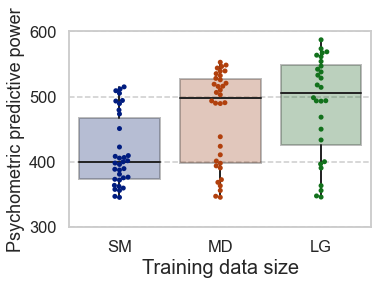

In [156]:
sns.set('talk', 'whitegrid', 'dark',
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

ax = sns.swarmplot(x=df[df['arch']!='ngram']["data_size"], y =df[df['arch']!='ngram']["delta_linear_fit_logLik"], order=['sm', 'md', 'lg'])
ax = sns.boxplot(x=df[df['arch']!='ngram']["data_size"], y =df[df['arch']!='ngram']["delta_linear_fit_logLik"], order=['sm', 'md', 'lg'], boxprops={'alpha':0.3}, showcaps=False, showfliers=False)
ax.set_xlabel('Training data size',fontsize=20)
ax.set_ylabel('Psychometric predictive power',fontsize=18)
ax.set_xticklabels(['SM', 'MD', 'LG'])
ax.set(ylim=(300,600))
fig = ax.get_figure()
fig.subplots_adjust(left=0.2, bottom=0.2)

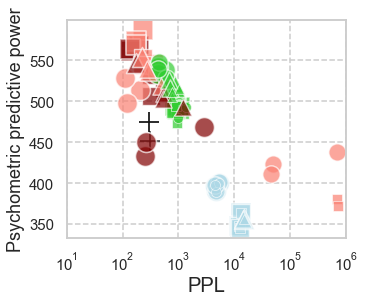

In [157]:
sns.set(font_scale=2)
sns.set('talk', 'whitegrid', 'dark',
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
fig, ax = plt.subplots(figsize=(5, 4))

for k, r in df.iterrows():
     if r['PPL'] < 1000000:
        sns.scatterplot(x=[r['PPL']], y=[r['delta_linear_fit_logLik']], 
                        marker=arch2shape[r['arch']], s=size2size[str(r['data_size'])], 
                        color=update2color[str(r['n_updates'])], alpha=0.7)
ax.set(xscale="log", xlim=(10,1000000))
ax.set_xlabel('PPL',fontsize=20)
ax.set_ylabel('Psychometric predictive power',fontsize=18)
plt.xscale('log')
ax.tick_params(labelsize=15)